In [2]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import xesmf as xe
import cartopy.crs as ccrs
import regionmask

In [3]:
ds = xr.open_dataset('../data/t2m_1980-2015_Winter.nc')
ds

<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721, time: 144)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 1980-01-01 1980-02-01 ... 2015-12-01
Data variables:
    t2m        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2024-02-19 10:15:53 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [4]:
dr = ds['t2m']
dr

<xarray.DataArray 't2m' (time: 144, latitude: 721, longitude: 1440)>
[149506560 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 1980-01-01 1980-02-01 ... 2015-12-01
Attributes:
    units:      K
    long_name:  2 metre temperature

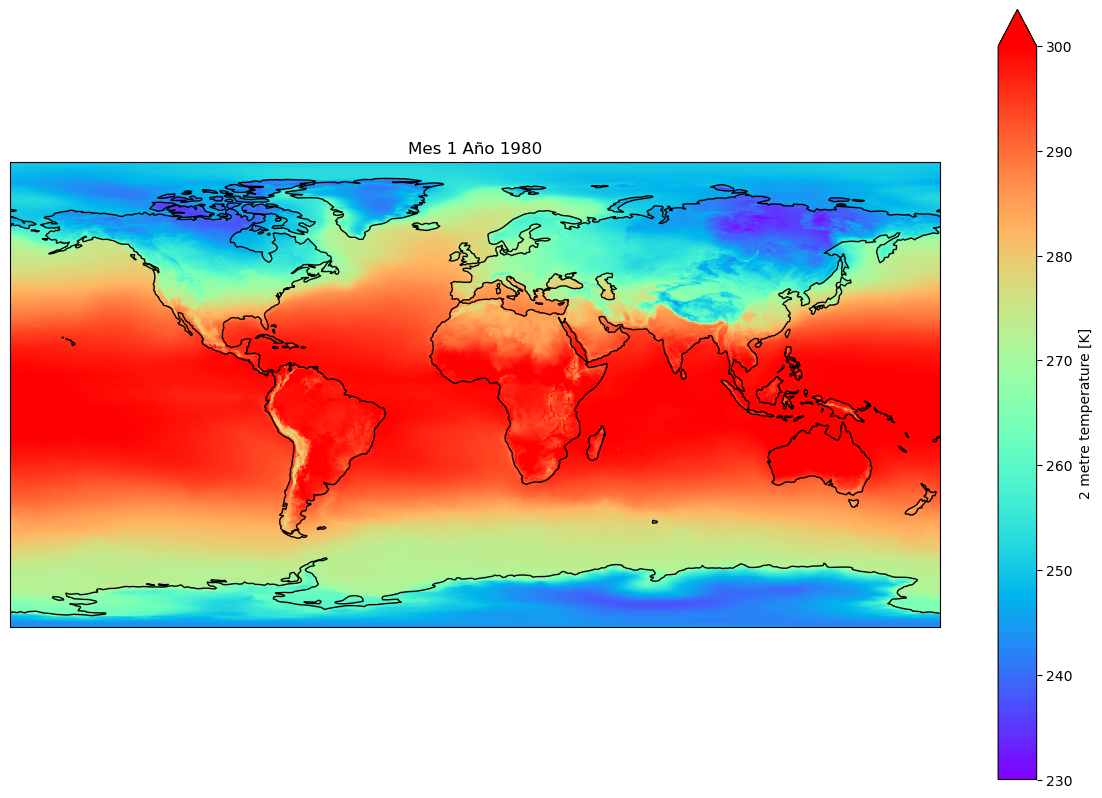

In [40]:
ax = plt.axes(projection=ccrs.PlateCarree())
dr.isel(time=0).plot.pcolormesh(ax=ax, vmin=230, vmax=300, cmap='rainbow')
ax.coastlines()
K = 0
plt.title('Mes ' + str(dr_out.isel(time=k).time.dt.month.values) + ' Año ' + str(dr_out.isel(time=k).time.dt.year.values))
plt.gcf().set_size_inches(15, 10)



## INPUT GRID

In [6]:
ds["latitude"].values

array([ 90.  ,  89.75,  89.5 ,  89.25,  89.  ,  88.75,  88.5 ,  88.25,
        88.  ,  87.75,  87.5 ,  87.25,  87.  ,  86.75,  86.5 ,  86.25,
        86.  ,  85.75,  85.5 ,  85.25,  85.  ,  84.75,  84.5 ,  84.25,
        84.  ,  83.75,  83.5 ,  83.25,  83.  ,  82.75,  82.5 ,  82.25,
        82.  ,  81.75,  81.5 ,  81.25,  81.  ,  80.75,  80.5 ,  80.25,
        80.  ,  79.75,  79.5 ,  79.25,  79.  ,  78.75,  78.5 ,  78.25,
        78.  ,  77.75,  77.5 ,  77.25,  77.  ,  76.75,  76.5 ,  76.25,
        76.  ,  75.75,  75.5 ,  75.25,  75.  ,  74.75,  74.5 ,  74.25,
        74.  ,  73.75,  73.5 ,  73.25,  73.  ,  72.75,  72.5 ,  72.25,
        72.  ,  71.75,  71.5 ,  71.25,  71.  ,  70.75,  70.5 ,  70.25,
        70.  ,  69.75,  69.5 ,  69.25,  69.  ,  68.75,  68.5 ,  68.25,
        68.  ,  67.75,  67.5 ,  67.25,  67.  ,  66.75,  66.5 ,  66.25,
        66.  ,  65.75,  65.5 ,  65.25,  65.  ,  64.75,  64.5 ,  64.25,
        64.  ,  63.75,  63.5 ,  63.25,  63.  ,  62.75,  62.5 ,  62.25,
      

In [7]:
ds["longitude"].values

array([0.0000e+00, 2.5000e-01, 5.0000e-01, ..., 3.5925e+02, 3.5950e+02,
       3.5975e+02], dtype=float32)

Resolución de 0.25º x 0.25º

## OUTPUT GRID

Resolución 0.5º x 0.5º

In [8]:
ds_out = xr.Dataset({'latitude': (['latitude'], np.arange(-89.75, 90.25, 0.5), {"units": "degrees_north"}),
                     'longitude': (['longitude'], np.arange(0.25, 360.25, 0.5), {"units": "degrees_east"}),
                    }
                   )
ds_out

<xarray.Dataset>
Dimensions:    (latitude: 360, longitude: 720)
Coordinates:
  * latitude   (latitude) float64 -89.75 -89.25 -88.75 ... 88.75 89.25 89.75
  * longitude  (longitude) float64 0.25 0.75 1.25 1.75 ... 358.8 359.2 359.8
Data variables:
    *empty*

# REGRIDDING

In [9]:
regridder = xe.Regridder(ds, ds_out, "conservative")
regridder  

/home/alonsor/miniconda3/envs/temporal-downscaling/lib/python3.12/site-packages/xesmf/backend.py:56: UserWarning: Latitude is outside of [-90, 90]
  warnings.warn('Latitude is outside of [-90, 90]')


xESMF Regridder 
Regridding algorithm:       conservative 
Weight filename:            conservative_721x1440_360x720.nc 
Reuse pre-computed weights? False 
Input grid shape:           (721, 1440) 
Output grid shape:          (360, 720) 
Periodic in longitude?      False

In [10]:
dr_out = regridder(dr, keep_attrs=True)
dr_out

<xarray.DataArray 't2m' (time: 144, latitude: 360, longitude: 720)>
array([[[294.91037, 290.2846 , 289.68262, ..., 285.93375, 294.16223,
         282.11053],
        [244.06784, 244.06915, 244.07057, ..., 244.06873, 244.06839,
         244.067  ],
        [244.53273, 244.52626, 244.52002, ..., 244.55832, 244.5493 ,
         244.54048],
        ...,
        [251.46751, 251.45084, 251.43451, ..., 251.52057, 251.50288,
         251.48473],
        [251.25006, 251.2398 , 251.22856, ..., 251.28484, 251.27309,
         251.26166],
        [303.36932, 298.63107, 298.01947, ..., 293.82422, 302.48022,
         290.16434]],

       [[283.88943, 279.4396 , 278.86282, ..., 275.24414, 283.16647,
         271.5686 ],
        [234.65996, 234.66455, 234.66881, ..., 234.65219, 234.6548 ,
         234.65665],
        [234.22777, 234.22072, 234.21426, ..., 234.25139, 234.24309,
         234.23444],
...
        [252.86757, 252.87466, 252.88094, ..., 252.85434, 252.85805,
         252.86206],
        [253.04793, 253.05238, 253.0569 , ..., 253.03983, 253.04262,
         253.0447 ],
        [306.25723, 301.4712 , 300.86032, ..., 296.58054, 305.3439 ,
         292.89206]],

       [[297.3661 , 292.69543, 292.08313, ..., 288.31976, 296.6182 ,
         284.4562 ],
        [245.92665, 245.92018, 245.91354, ..., 245.94798, 245.94057,
         245.9335 ],
        [246.06789, 246.05392, 246.03929, ..., 246.11421, 246.09879,
         246.08311],
        ...,
        [246.17044, 246.17546, 246.18106, ..., 246.15398, 246.15948,
         246.16446],
        [246.12453, 246.12589, 246.12747, ..., 246.11816, 246.12065,
         246.12271],
        [297.70078, 293.04913, 292.45395, ..., 288.3026 , 296.81616,
         284.71674]]], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 1980-01-01 1980-02-01 ... 2015-12-01
  * latitude   (latitude) float64 -89.75 -89.25 -88.75 ... 88.75 89.25 89.75
  * longitude  (longitude) float64 0.25 0.75 1.25 1.75 ... 358.8 359.2 359.8
Attributes:
    units:          K
    long_name:      2 metre temperature
    regrid_method:  conservative

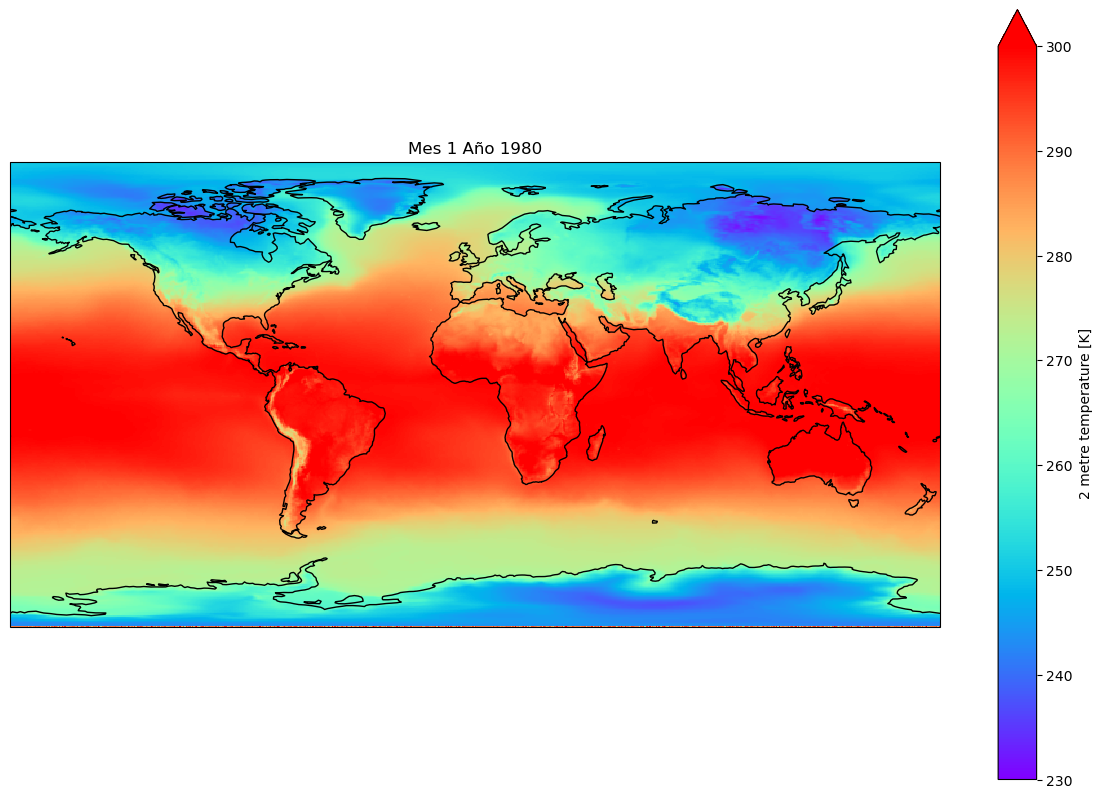

In [38]:
ax = plt.axes(projection=ccrs.PlateCarree())
k = 0 # Posición temporal
dr_out.isel(time=k).plot.pcolormesh(ax=ax, vmin=230, vmax=300, cmap='rainbow')
ax.coastlines()
plt.title('Mes ' + str(dr_out.isel(time=k).time.dt.month.values) + ' Año ' + str(dr_out.isel(time=k).time.dt.year.values))
plt.gcf().set_size_inches(15, 10)

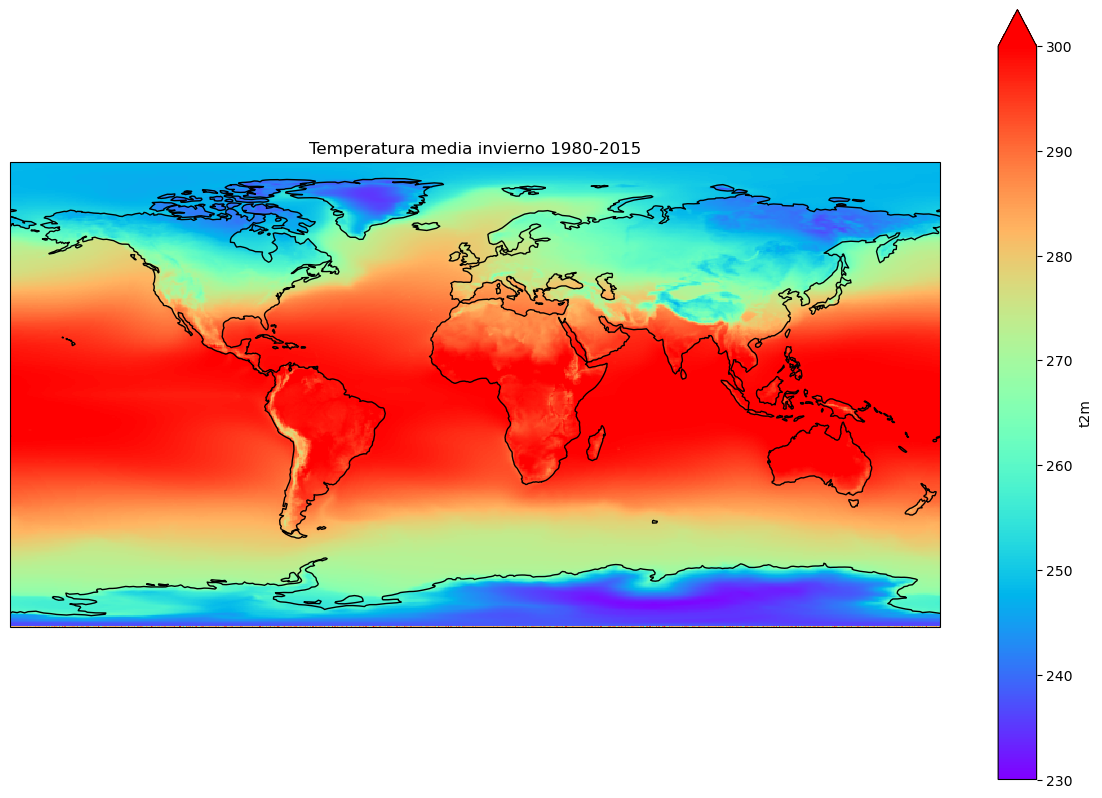

In [35]:
dr_out_mean = dr_out.mean(dim='time')
ax = plt.axes(projection=ccrs.PlateCarree())
dr_out_mean.plot.pcolormesh(ax=ax, vmin=230, vmax=300, cmap='rainbow')
ax.coastlines()
plt.title('Temperatura media invierno 1980-2015')
plt.gcf().set_size_inches(15, 10)


# REGIÓN MEDITERRÁNEO

In [13]:
ar6 = regionmask.defined_regions.ar6.all
ar6

<regionmask.Regions 'AR6 reference regions'>
Source:   Iturbide et al., 2020 (Earth Syst. Sci. Data)
overlap:  False

Regions:
 0 GIC      Greenland/Iceland
 1 NWN      N.W.North-America
 2 NEN      N.E.North-America
 3 WNA        W.North-America
 4 CNA        C.North-America
..  ..                    ...
53 ARS            Arabian-Sea
54 BOB          Bay-of-Bengal
55 EIO Equatorial.Indic-Ocean
56 SIO          S.Indic-Ocean
57 SOO         Southern-Ocean

[58 regions]

<GeoAxes: >

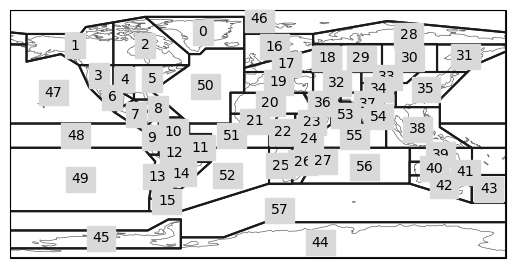

In [78]:
ar6.plot()

In [25]:
mask = ar6.mask(ds_out["longitude"], ds_out["latitude"])
mask

<xarray.DataArray 'mask' (latitude: 360, longitude: 720)>
array([[44., 44., 44., ..., 44., 44., 44.],
       [44., 44., 44., ..., 44., 44., 44.],
       [44., 44., 44., ..., 44., 44., 44.],
       ...,
       [46., 46., 46., ..., 46., 46., 46.],
       [46., 46., 46., ..., 46., 46., 46.],
       [46., 46., 46., ..., 46., 46., 46.]])
Coordinates:
  * latitude   (latitude) float64 -89.75 -89.25 -88.75 ... 88.75 89.25 89.75
  * longitude  (longitude) float64 0.25 0.75 1.25 1.75 ... 358.8 359.2 359.8
Attributes:
    standard_name:  region
    flag_values:    [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18...
    flag_meanings:  GIC NWN NEN WNA CNA ENA NCA SCA CAR NWS NSA NES SAM SWS S...

In [26]:
region_masked = dr_out.where(mask == 19)
mean_temp = region_masked.mean(dim='time')

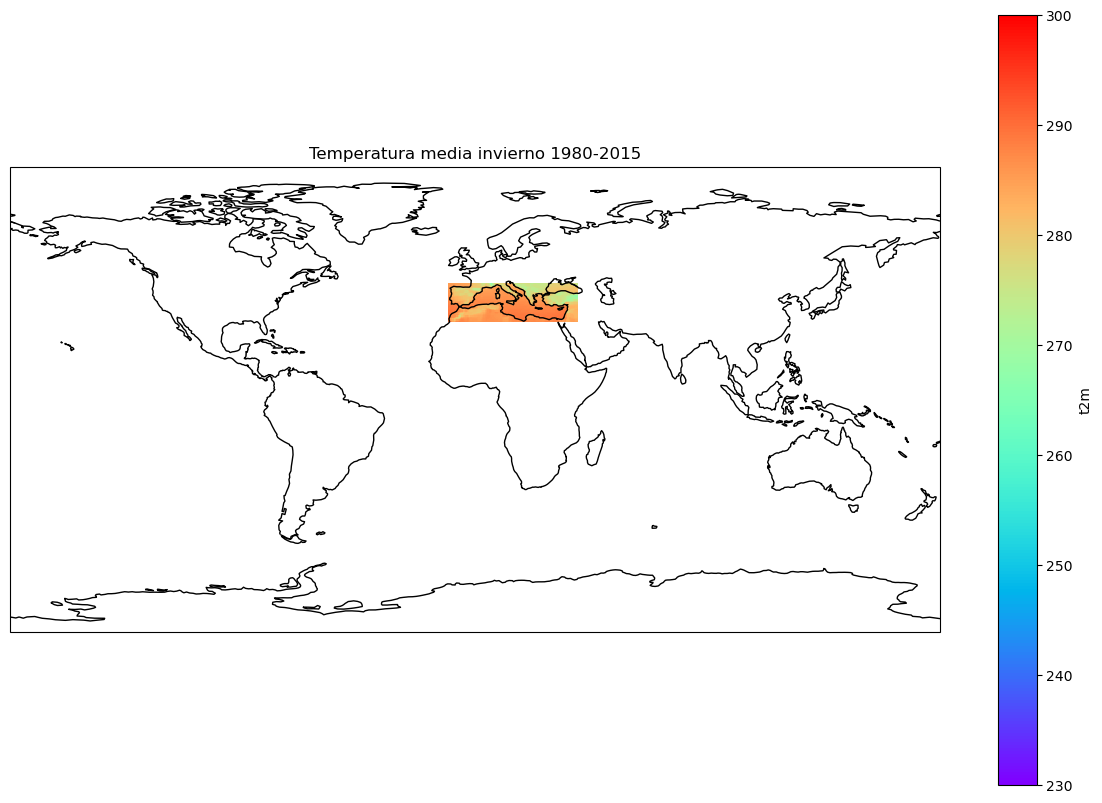

In [41]:
ax = plt.axes(projection=ccrs.PlateCarree())
mean_temp.plot.pcolormesh(ax=ax, vmin=230, vmax=300, cmap='rainbow')
ax.coastlines()
plt.title('Temperatura media invierno 1980-2015')
plt.gcf().set_size_inches(15, 10)

In [28]:
# Se cambian los valores de longitud de 0-360 a -180-180
region_masked["longitude"] = (region_masked["longitude"] + 180) % 360 - 180

In [29]:
# Se buscan los valores (no NaN) de latitud y longitud mínimos y máximos para fijar los límites del mapa
lon_min = region_masked["longitude"].where(~region_masked.isnull()).min().values
lon_max = region_masked["longitude"].where(~region_masked.isnull()).max().values
lat_min = region_masked["latitude"].where(~region_masked.isnull()).min().values
lat_max = region_masked["latitude"].where(~region_masked.isnull()).max().values

lon_min, lon_max, lat_min, lat_max

(array(-9.75), array(39.75), array(30.25), array(44.75))

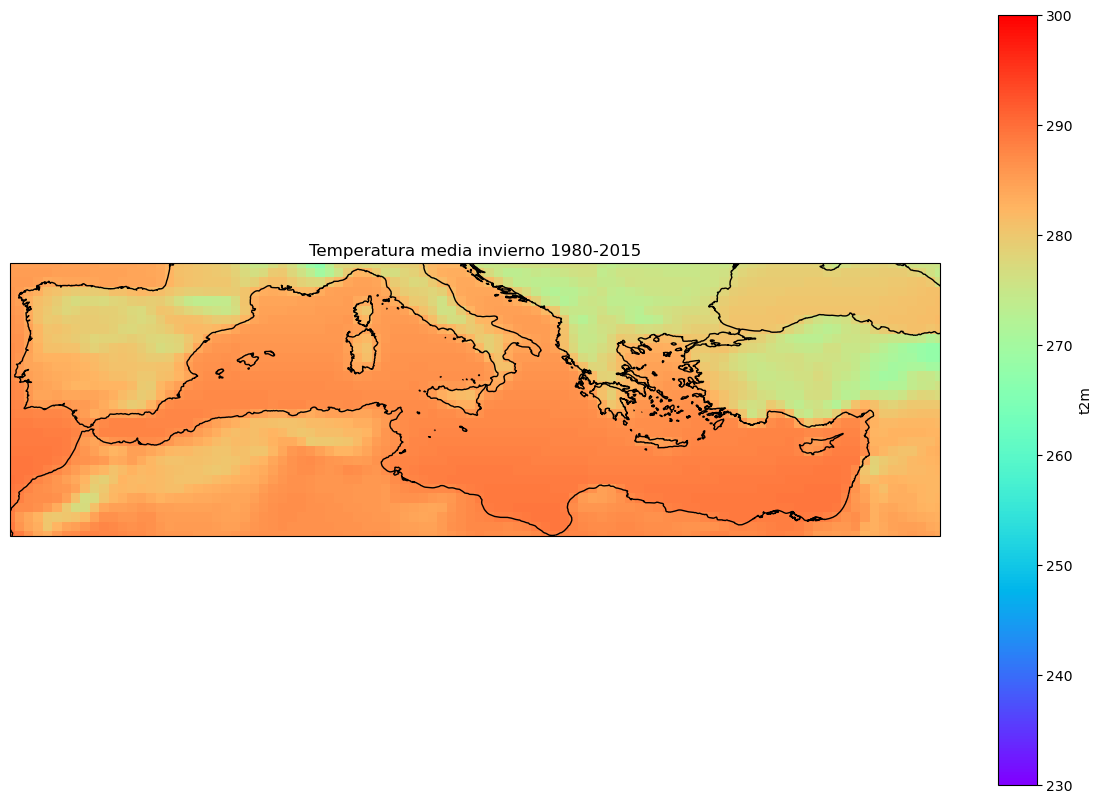

In [42]:
# Fijando los límites del mapa
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())
mean_temp.plot.pcolormesh(ax=ax, vmin=230, vmax=300, cmap='rainbow')
ax.coastlines()
plt.title('Temperatura media invierno 1980-2015')
plt.gcf().set_size_inches(15, 10)

# SERIE TEMPORAL / AGREGACIÓN ESPACIAL

In [52]:
# Calcular pesos basados en la latitud
weights = np.cos(np.deg2rad(dr_out["latitude"]))

Se hace una media de todos los meses para cada año para tener un único valor por año. Se utiliza el dataset region_masked ya que todavía
no se ha hecho la media temporal y recoge la región mediterráneo.

In [72]:
# Resample a nivel anual ("Y) y se hace la media
region_masked_anual = region_masked.resample(time="Y").mean()
region_masked_anual

<xarray.DataArray 't2m' (time: 36, latitude: 360, longitude: 720)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * latitude   (latitude) float64 -89.75 -89.25 -88.75 ... 88.75 89.25 89.75
  * longitude  (longitude) float64 0.25 0.75 1.25 1.75 ... -1.25 -0.75 -0.25
  * time       (time) datetime64[ns] 1980-12-31 1981-12-31 ... 2015-12-31
Attributes:
    units:          K
    long_name:      2 metre temperature
    regrid_method:  conservative

In [73]:
# Se hace una media ponderada por la latitud
region_masked_anual_weighted = region_masked_anual.weighted(weights).mean(("latitude", "longitude"))

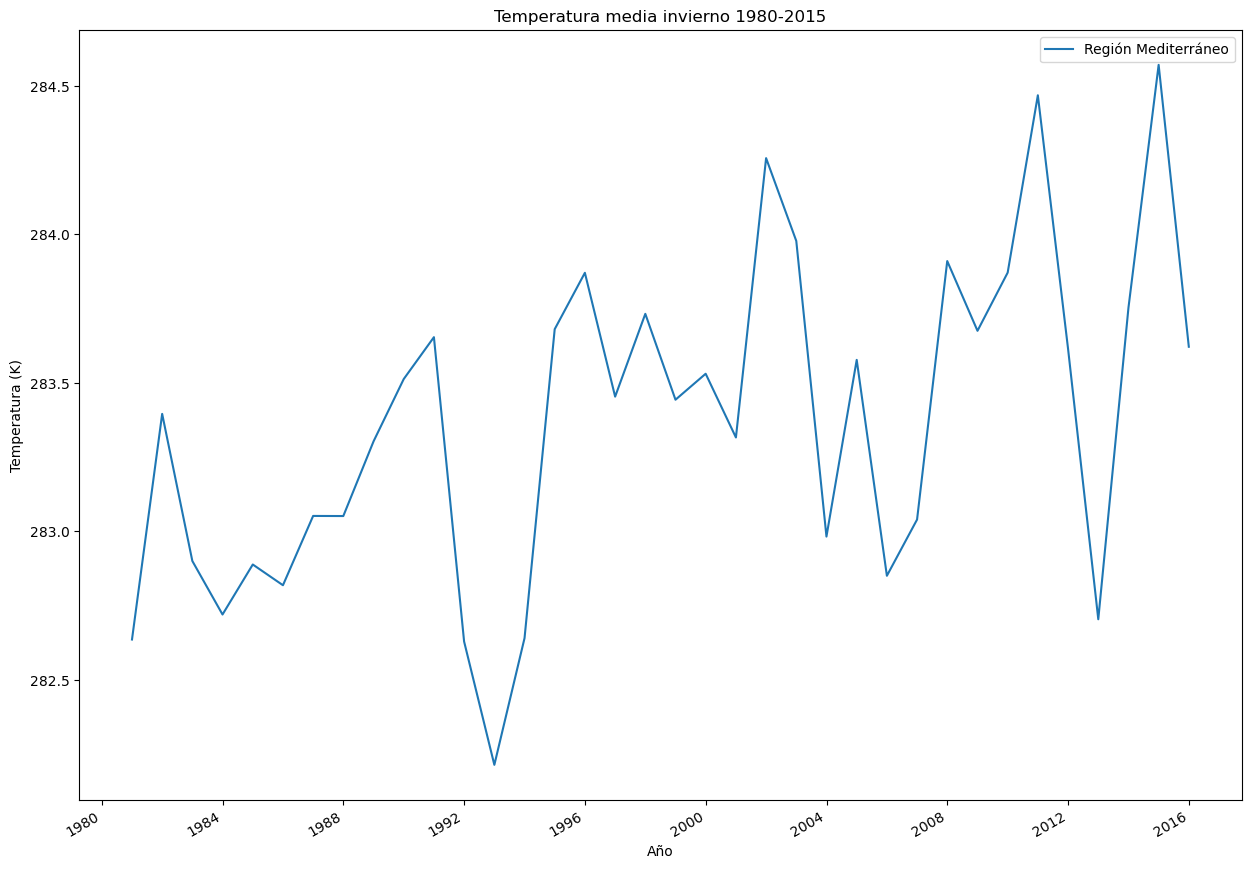

In [74]:
# Se hace un gráfico de la serie temporal
f, ax = plt.subplots()
region_masked_anual_weighted.plot.line(ax = ax, label= 'Región Mediterráneo')
ax.set_title('Temperatura media invierno 1980-2015')
ax.set_ylabel('Temperatura (K)')
ax.set_xlabel('Año')
ax.legend()
plt.gcf().set_size_inches(15, 10)